In [ ]:
import numpy as np                   # Math library
import matplotlib.pyplot as plt      # for plotting
from keras.datasets import mnist     # importing mnsit dataset
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation,Flatten # Layers-type
from keras.utils import np_utils     # NumPy library

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0


In [ ]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
num_classes = 10 # class label

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)


In [ ]:
input_shape = (28, 28, 1)
# Sequential model to create deep neural network

model = Sequential()

# after input layer 256 nuerons in hidden layer.

model.add(Flatten(input_shape=input_shape))
model.add(Dense(256))

# relu activation after 1st hidden layer

model.add(Activation('relu'))

# dropout help to reduce chance of overfitting.
model.add(Dropout(0.45))

# 2nd hidden layer created with 512 neurons,relu activation and dropout value 0.45.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.45))

# output layer with 10 neurons because we have 10 class labels.
model.add(Dense(10))

# softmax activation after output layer.

model.add(Activation('softmax'))

# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# fitting model on training images.

history = model.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1,validation_data=(X_test,Y_test))


Epoch 1/20
469/469 [==============================] - 14s 24ms/step - loss: 0.3783 - accuracy: 0.8835 - val_loss: 0.1370 - val_accuracy: 0.9587
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1726 - accuracy: 0.9483 - val_loss: 0.1037 - val_accuracy: 0.9681
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1389 - accuracy: 0.9578 - val_loss: 0.0899 - val_accuracy: 0.9721
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1166 - accuracy: 0.9638 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1045 - accuracy: 0.9682 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0954 - accuracy: 0.9704 - val_loss: 0.0702 - val_accuracy: 0.9799
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0866 - accuracy: 0.9725 - val_loss: 0.0658 - val_accuracy: 0.97

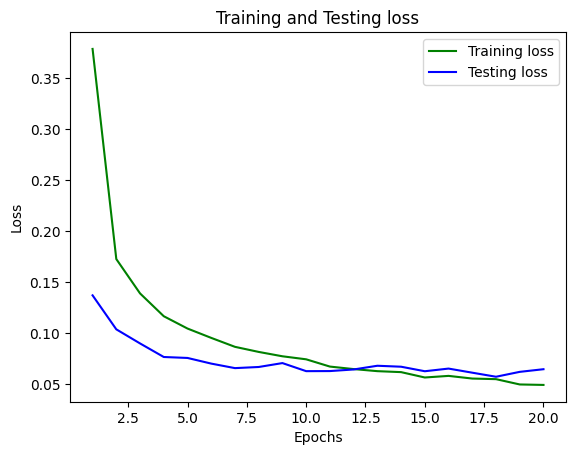

In [ ]:
#plotting training and testing loss with epochs.
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

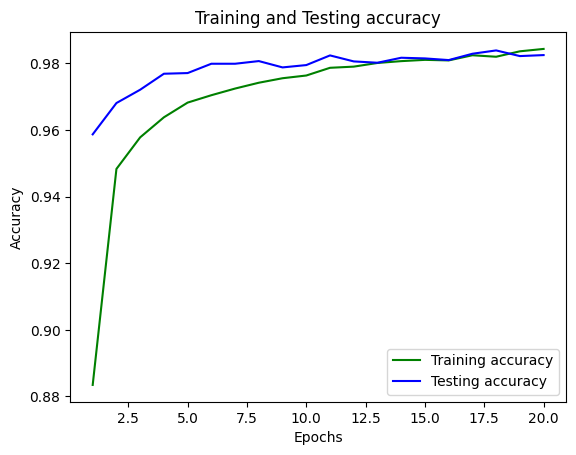

In [ ]:
# plotting training and testing accuracy with epochs.

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# FGSM attack method implementation
# import the necessary packages
from tensorflow.keras.losses import MSE
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def adversarial_pattern(model, image, label, eps=2 / 255.0):
  image = tf.cast(image, tf.float32) # cast the image

  with tf.GradientTape() as tape: # record our gradients
        tape.watch(image)
        prediction = model(image)
        loss = MSE(label, prediction) # mean squared error used for calculating prediction and ground truth label error

  gradient = tape.gradient(loss, image) # gradient loss
  signed_grad = tf.sign(gradient) #signed gradient
  adversary = (image + (signed_grad * eps)).numpy() # FGSM atttack formula to create adversary
  return adversary

In [ ]:
accuracies = []
epsilons = [0, .05, .1, .15, .2, .25, .3, .35, .4, .45]
test_size = 35
# creating adversaries for each epsilons and predicting using trained model.
for eps in epsilons:
    correct = 0
    print("below adversaries created for epsilon = ", eps)
    # loop over a sample of our testing images
    for i in np.random.choice(np.arange(0, len(X_test)), size=(test_size)):
      # grab the current image and label
      image = X_test[i]
      image = image.reshape(1, 28, 28, 1)
      label = Y_test[i]
      # create adversary using current epsilon value and predicting using trained model
      adversary = adversarial_pattern(model, image, label, eps)
      predict_x=model.predict(adversary)
      classes_x=np.argmax(predict_x,axis=1) # taking class value from prediction
      # scaling both the original image and adversary to the range
      adversary = adversary.reshape((28, 28)) * 255
      adversary = np.clip(adversary, 0, 255).astype("uint8")
      image = image.reshape((28, 28)) * 255
      image = image.astype("uint8")
      print('\n')
      # convert the image and adversarial image from grayscale to three
      # channel (so we can draw on them)
      image = np.dstack([image] * 3)
      adversary = np.dstack([adversary] * 3)
      # resize the images so we can better visualize them
      image = cv2.resize(image, (96, 96))
      adversary = cv2.resize(adversary, (96, 96))
      # determine the predicted label for both the original image and
      # adversarial image
      imagePred = label.argmax()
      adversaryPred = classes_x[0]
      color = (0, 255, 0)
      # if the image prediction does not match the adversarial
      # prediction then update the color
      if imagePred != adversaryPred:
        color = (0, 0, 255)
      # draw the predictions on the respective output images
      cv2.putText(image, str(imagePred), (2, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
      cv2.putText(adversary, str(adversaryPred), (2, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
      #green label means true prediction and red lable means false prediction
      output = np.hstack([image, adversary])
      cv2_imshow(output)
      cv2.waitKey(0)
      #calculating model accuraies on adversaries
      if imagePred == adversaryPred:
        correct = correct + 1
    accuracies.append((correct/test_size)*100)
print("accuracies of model with eps=0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45 in percentage " ,accuracies)

In [ ]:
 def adversarial_pattern(model, image, label, eps=2 / 255.0):
  image = tf.cast(image, tf.float32) # cast the image

  with tf.GradientTape() as tape: # record our gradients
        tape.watch(image)
        prediction = model(image)
        loss = MSE(label, prediction) # mean squared error used for calculating prediction and ground truth label error

  gradient = tape.gradient(loss, image) # gradient loss
  signed_grad = tf.sign(gradient) #signed gradient
  adversary = (image + (signed_grad * eps)).numpy() # FGSM atttack formula to create adversary
  return adversary

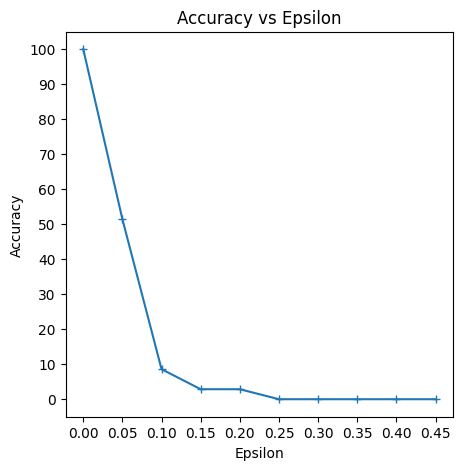

In [ ]:
# plotting accuracy vs Epsilon graph
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "+-")
plt.yticks(np.arange(0, 101, step=10))
plt.xticks(np.arange(0, .5, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()